In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.getSyntheticData as SyntheticData
import data.getHiggsData as HiggsData

from models.OCSMM import OCSMM
from utils.gridSearch import *


In [2]:
# Experiment plots
def plot_synthetic_data(Stest, scores):
    scores = np.squeeze(scores)
    score_plot = [np.array([sc]*Splot[idx].shape[0]) for idx, sc in enumerate(scores)]
    mini, maxi = -2.5, 2.5
    norm = plt.Normalize(mini, maxi)
    
    fig, axes = plt.subplots(2, 6, figsize=(15, 4.5), sharey=True)
    idx=0
    for ax in axes.flat:
        ax.scatter(Splot[idx][:,0], Splot[idx][:,1], 
                         c=score_plot[idx], cmap='viridis', norm=norm)
        idx+=1
        
    for a, color in zip([axes[1][9%6], axes[1][10%6], axes[1][11%6]], ['green', 'red', 'purple']):
        plt.setp(a.spines.values(), color=color, ls=':')
        plt.setp([a.get_xticklines(), a.get_yticklines()], color=color, ls=':')
    
    fig.tight_layout()
    fig.colorbar(plt.gca().get_children()[0], ax=axes.ravel().tolist()).set_label('Anomaly Score')
    plt.show()

def plot_roc_curve(Stest, Ytest, clf):
    # Receives trained clasiffier and plots its roc curve
    # Against Test Set.
    print("Calculating anomaly scores")
    scores = clf.decision_function(Stest)
    print("Calculating empirical p values")
    p_values = empirical_p_values(scores)
    auc, best_cut, roc_curve = roc_auc(Ytest, p_values)
    plt.plot(roc_curve[:,0], roc_curve[:,1], 
             label='(C:%f,gamma:%f)'% (np.round(C,1),np.round(gamma,2)))
    plt.show()
    

In [ ]:
# Generate Synthetic Data
Strain = SyntheticData.genSyntheticTrainData(n_sample=100, n_sets=50)
Stest, Ytest = SyntheticData.getSyntheticTestData(n_sample=100, n_sets=100)

Splot = SyntheticData.genSyntheticTrainData(n_sample=100, n_sets=9)
X_anomaly1 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly2 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly3 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
# X_anomaly2 = data.genSyntheticSet(100, pmix=[0.33, 0.64, 0.03])
# X_anomaly3 = data.genSyntheticSet(100, pmix=[0.84, 0.08, 0.08])
Splot.extend([X_anomaly1, X_anomaly2, X_anomaly3])


In [ ]:
# Test plot
C = 1
gamma = 1
clf = OCSMM(Strain, C, gamma)
clf.fit()
scores = clf.decision_function(Splot)
plot_synthetic_data(Splot, scores)


In [ ]:
# Test Gridsearch
gammas = [0.4, 0.5, 1, 2, 3]
Cs = [1, 4, 5, 6]
grids = {'gammas': gammas, 'Cs': Cs}
performance = gridSearch(Strain, Stest, Ytest, grids)
performance

In [ ]:
C = 4
gamma = 3
clf = OCSMM(Strain, C, gamma)
clf.fit()
sc = clf.decision_function(Splot)
p_values = empirical_p_values(sc)
# auc, best_cut = roc_auc([0,0,0,0,0,0,0,0,0,1,1,1], p_values)
# Ypred = (p_values < best_cut)*1

plot_synthetic_data(Splot, np.exp(sc))
# plot_data(Splot, np.exp(p_values))
# plot_data(Splot, Ypred)

In [ ]:
C = 1
gamma = 1
clf = OCSMM(Strain, C, gamma)
clf.fit()
scores = clf.decision_function(Stest)
# plot_data(Splot, scores)
p_values = empirical_p_values(scores)
auc, best_cut, roc_curve = roc_auc(Ytest, p_values)




In [4]:
# Generate Higgs Data
# Varying masses HiggsSM100m HiggsSM115m HiggsSM135m HiggsSM150m
# For train generate only background noise
# For test generate 100 background noises and 20 sets with Higgs bosson
HiggsStrain = HiggsData.genTrainSet('HiggsSM100m', num_events=100, seed=1)
HiggsStest, HiggsYtest = HiggsData.genTestSet('HiggsSM100m', [100, 20], seed=101)


In [5]:
C = 1
gamma = 1
clf = OCSMM(HiggsStrain, C, gamma)
clf.fit()


     pcost       dcost       gap    pres   dres
 0:  4.1090e-01 -1.0182e+02  4e+02  1e+00  2e-15
 1:  4.4543e-01 -2.7316e+01  3e+01  4e-03  4e-15
 2:  4.4619e-01 -5.2263e-01  1e+00  1e-04  6e-15
 3:  4.1252e-01 -8.8152e-02  5e-01  1e-15  2e-15
 4:  4.0030e-01  2.6290e-01  1e-01  2e-16  1e-15
 5:  3.7646e-01  3.4700e-01  3e-02  3e-16  1e-15
 6:  3.6915e-01  3.6043e-01  9e-03  1e-15  1e-15
 7:  3.6588e-01  3.6561e-01  3e-04  3e-16  1e-15
 8:  3.6576e-01  3.6576e-01  3e-06  2e-16  1e-15
 9:  3.6576e-01  3.6576e-01  3e-08  3e-16  1e-15
Optimal solution found.


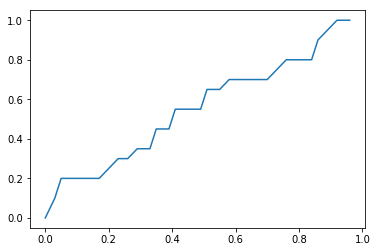

In [6]:
plot_roc_curve(HiggsStest, HiggsYtest, clf)
